In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from IPython.display import IFrame
import plotly.express as px



In [2]:
df=pd.read_csv("Dataset .csv",encoding='ISO-8859-1')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ï¿½ï¿½stanbul,"Kemankeï¿½ï¿½ Karamustafa Paï¿½ï¿½a Mahallesi,...",Karakï¿½_y,"Karakï¿½_y, ï¿½ï¿½stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aï¿½ï¿½acÛ±,208,ï¿½ï¿½stanbul,"Koï¿½ï¿½uyolu Mahallesi, Muhittin ï¿½ï¿½stï¿½_...",Koï¿½ï¿½uyolu,"Koï¿½ï¿½uyolu, ï¿½ï¿½stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ï¿½ï¿½stanbul,"Kuruï¿½_eï¿½ï¿½me Mahallesi, Muallim Naci Cadd...",Kuruï¿½_eï¿½ï¿½me,"Kuruï¿½_eï¿½ï¿½me, ï¿½ï¿½stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aï¿½ï¿½ï¿½k Kahve,208,ï¿½ï¿½stanbul,"Kuruï¿½_eï¿½ï¿½me Mahallesi, Muallim Naci Cadd...",Kuruï¿½_eï¿½ï¿½me,"Kuruï¿½_eï¿½ï¿½me, ï¿½ï¿½stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
replacement={
    'ï¿½':'I',
    'ï¿½': 'U', 
    'Û±': 'U'
}

In [4]:
def replace_chars(text):
    for wrong, right in replacement.items():
        text = text.replace(wrong, right)
    return text


df = df.applymap(lambda x: replace_chars(x) if isinstance(x, str) else x)


C:\Users\user\AppData\Local\Temp\ipykernel_7816\258645160.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: replace_chars(x) if isinstance(x, str) else x)


In [5]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,NamlU Gurme,208,UUstanbul,"KemankeUU Karamustafa PaUUa Mahallesi, RUhtUm ...",KarakU_y,"KarakU_y, UUstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AUUacU,208,UUstanbul,"KoUUuyolu Mahallesi, Muhittin UUstU_ndaUU Cadd...",KoUUuyolu,"KoUUuyolu, UUstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,UUstanbul,"KuruU_eUUme Mahallesi, Muallim Naci Caddesi, N...",KuruU_eUUme,"KuruU_eUUme, UUstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,AUUUk Kahve,208,UUstanbul,"KuruU_eUUme Mahallesi, Muallim Naci Caddesi, N...",KuruU_eUUme,"KuruU_eUUme, UUstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,UUstanbul,"CafeaUUa Mahallesi, BademaltU Sokak, No 21/B, ...",Moda,"Moda, UUstanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [6]:
df[['Latitude', 'Longitude']].describe()

,Latitude,Longitude
count,9551.000000,9551.000000
mean,25.854381,64.126574
std,11.007935,41.467058
min,-41.330428,-157.948486
25%,28.478713,77.081343
50%,28.570469,77.191964
75%,28.642758,77.282006
max,55.976980,174.832089


In [7]:
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=12)

In [8]:
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant Name']
    ).add_to(map)

In [9]:
map.save('restaurants_map.html')

In [10]:
map_file_path = 'restaurants_map.html'

In [24]:
IFrame(map_file_path, width=600, height=400)

In [12]:
city_counts = df['City'].value_counts()

In [13]:
locality_counts = df['Locality'].value_counts()

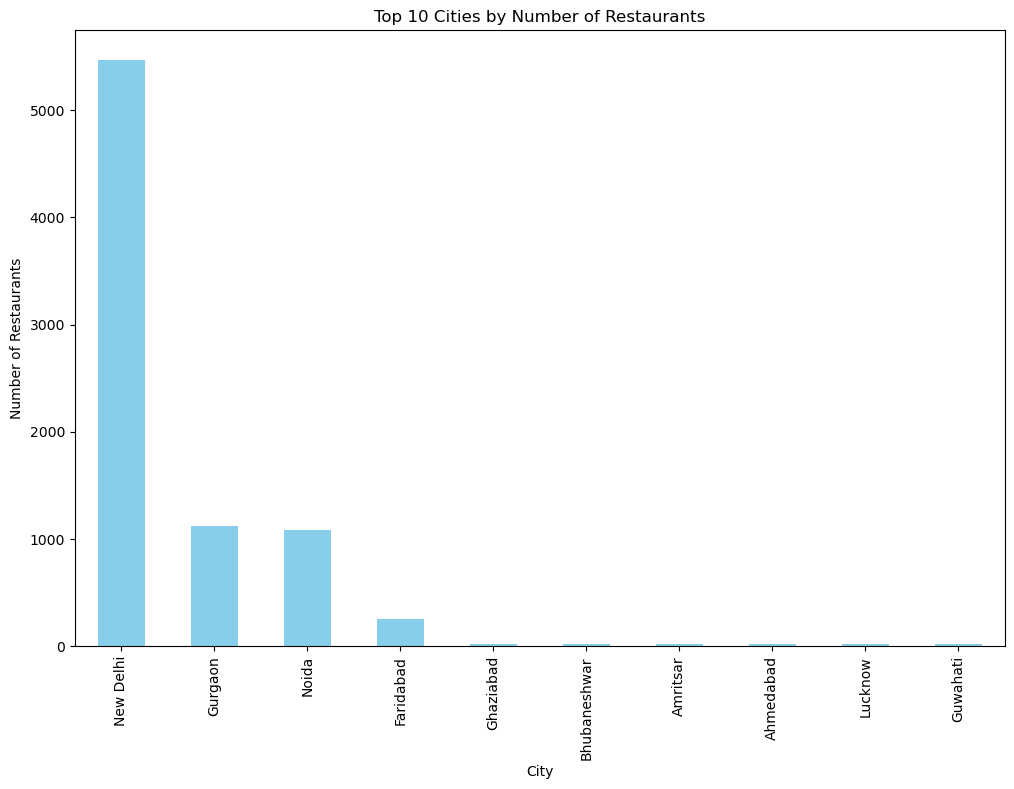

In [14]:
top_cities = city_counts.nlargest(10)
plt.figure(figsize=(12, 8))
top_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.show()

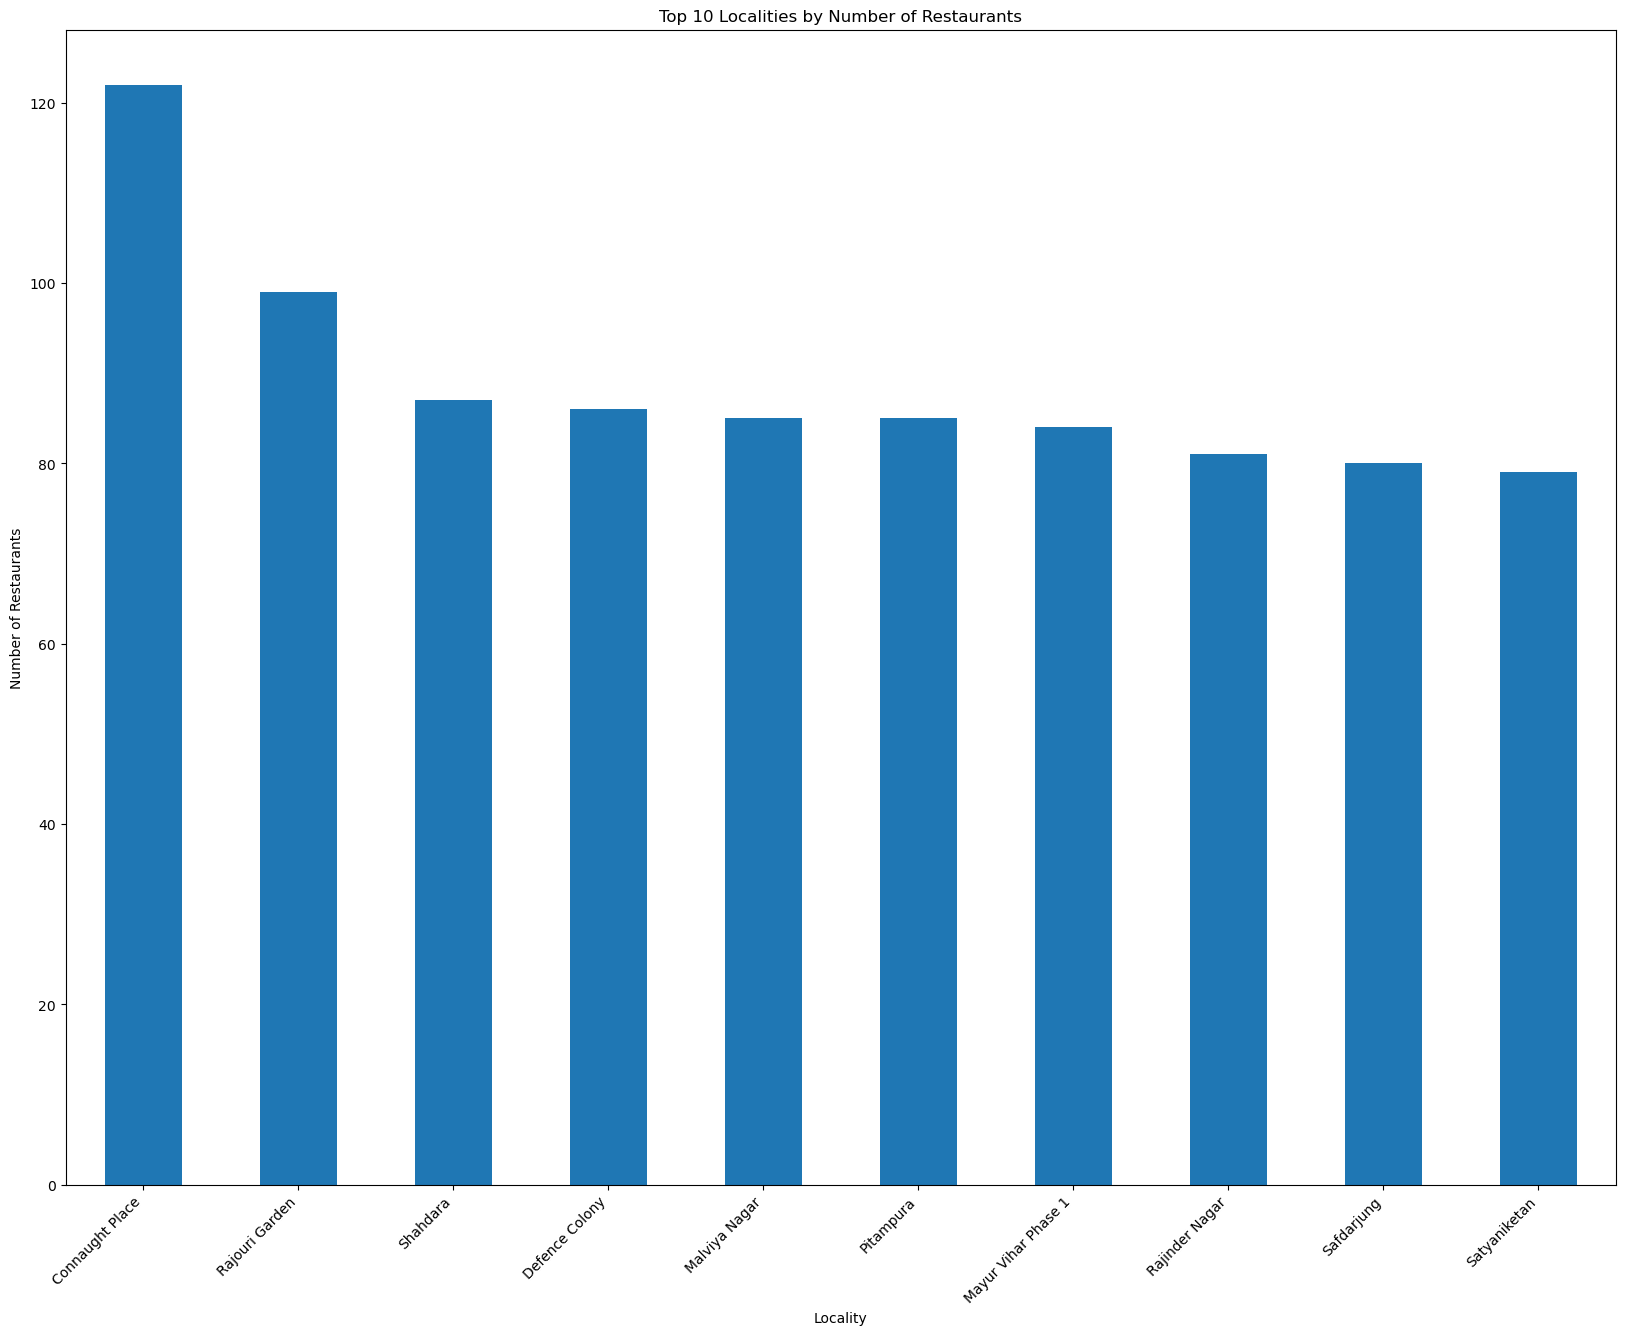

In [15]:
top_10_localities = locality_counts.head(10)
plt.figure(figsize=(20, 15))
top_10_localities.plot(kind='bar')
plt.title('Top 10 Localities by Number of Restaurants')
plt.xlabel('Locality')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [16]:
avg_rating_by_city = df.groupby('City')['Aggregate rating'].mean()

In [17]:
df['Price range'] = df['Price range'].astype(float)  
avg_price_by_city = df.groupby('City')['Price range'].mean()

In [18]:
print(avg_price_by_city)
print(avg_rating_by_city)

City
Abu Dhabi          3.300000
Agra               2.650000
Ahmedabad          2.571429
Albany             1.700000
Allahabad          2.650000
                     ...   
Waterloo           1.750000
Weirton            2.000000
Wellington City    3.250000
Winchester Bay     2.000000
Yorkton            2.000000
Name: Price range, Length: 141, dtype: float64
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Waterloo           3.650000
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
Name: Aggregate rating, Length: 141, dtype: float64


In [19]:
cuisines_by_city = df.groupby('City')['Cuisines'].apply(lambda x: x.str.split(',').explode().value_counts())


In [20]:
print(cuisines_by_city['Makati City'])



French       1
 Japanese    1
 Desserts    1
Japanese     1
Name: Cuisines, dtype: int64


In [21]:
top_cities = city_counts[city_counts > 20]
print(f'Cities with high restaurant density: {top_cities}')

Cities with high restaurant density: City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


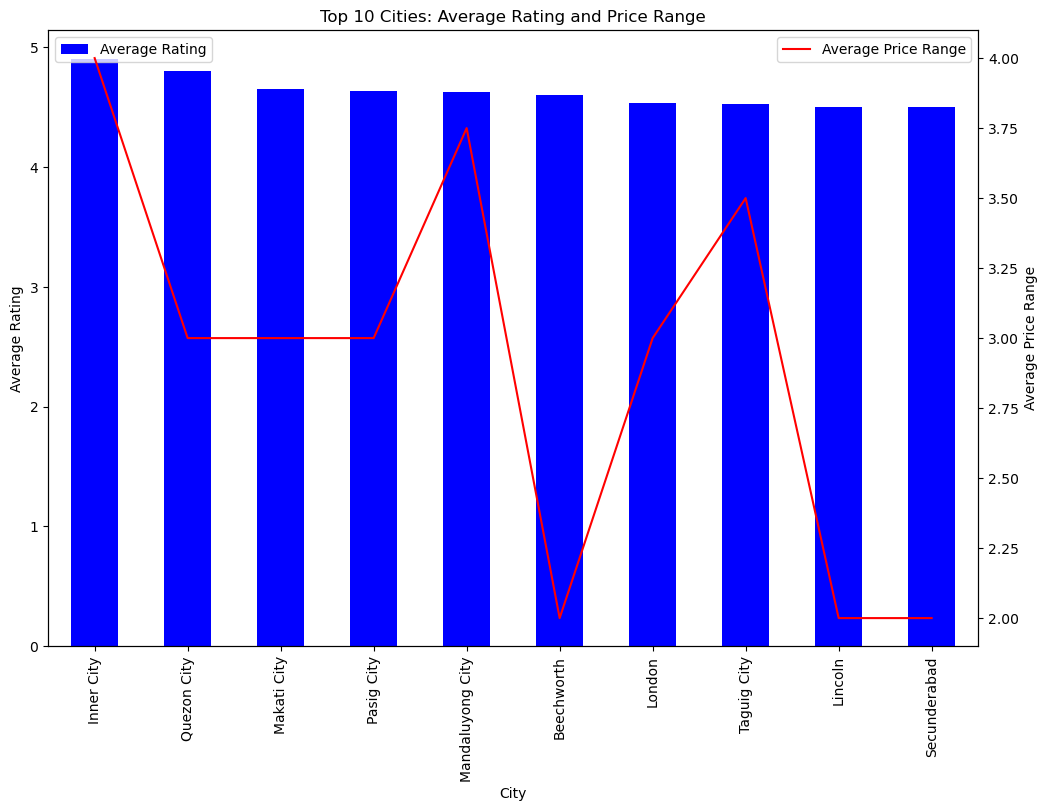

In [22]:
top_cities = avg_rating_by_city.nlargest(10).index
filtered_avg_rating = avg_rating_by_city[top_cities]
filtered_avg_price = avg_price_by_city[top_cities]
plt.figure(figsize=(12, 8))
ax1 = plt.gca()
filtered_avg_rating.plot(kind='bar', color='blue', label='Average Rating', ax=ax1)
ax1.set_xlabel('City')
ax1.set_ylabel('Average Rating')
ax1.set_xticklabels(filtered_avg_rating.index, rotation=90)
ax2 = ax1.twinx()
filtered_avg_price.plot(kind='line', color='red', label='Average Price Range', ax=ax2)
ax2.set_ylabel('Average Price Range')
plt.title('Top 10 Cities: Average Rating and Price Range')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()